In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

print('Packages loaded.')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_pickle('churn_data_clean.pkl')

In [ ]:
print(df.shape)
df.head()

In [ ]:
df.describe(include = 'all').transpose()

(array([ 15.,   5.,  11.,  12.,  17.,  16.,  23.,  16.,  27.,  26.,  43.,
         33.,  35.,  47.,  48.,  67.,  53.,  81.,  74., 100.,  76., 110.,
         87.,  74., 137.,  99., 134.,  93., 145.,  84., 143.,  82., 122.,
         93.,  98., 125.,  78., 108.,  56.,  94.,  52.,  62.,  65.,  46.,
         33.,  48.,  42.,  28.,  24.,  20.,  24.,  14.,  20.,   8.,  15.,
         10.,   7.,   5.,   3.,   3.,   5.,   3.,   2.,   1.,   4.,   0.,
          1.,   0.,   0.,   1.]),
 array([  1.        ,   4.45714286,   7.91428571,  11.37142857,
         14.82857143,  18.28571429,  21.74285714,  25.2       ,
         28.65714286,  32.11428571,  35.57142857,  39.02857143,
         42.48571429,  45.94285714,  49.4       ,  52.85714286,
         56.31428571,  59.77142857,  63.22857143,  66.68571429,
         70.14285714,  73.6       ,  77.05714286,  80.51428571,
         83.97142857,  87.42857143,  90.88571429,  94.34285714,
         97.8       , 101.25714286, 104.71428571, 108.17142857,
        11

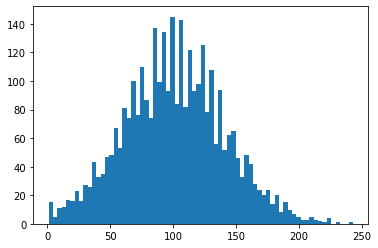

In [9]:
plt.hist(df['account length'], bins = 70)

In [ ]:
sb.pairplot(df, hue = 'churn')

In [10]:
features = ['account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total eve minutes', 'total eve calls',
       'total night minutes', 'total night calls', 'total intl minutes',
       'total intl calls', 'customer service calls',
       'total_minutes', 'night_perc', 'eve_perc', 'total_calls',
       'night_owl', 'day_only', 'traveler', 'eve_only']

In [11]:
X = df[features]
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8, test_size = 0.2)


In [12]:
# at this point I will standardize all of the training data and then create a pipeline for that as well

X_train.head()

cat_lst = ['area code','international plan','voice mail plan']
con_lst = [x for x in X_train.columns.values if x not in cat_lst]


In [13]:
X_train_ohe = pd.get_dummies(X_train, drop_first = True)

X_test_ohe = pd.get_dummies(X_test, drop_first = True)

In [13]:
y_train.value_counts()

0    2282
1     384
Name: churn, dtype: int64

In [23]:
y_test.value_counts()

0    568
1     99
Name: churn, dtype: int64

### Dummy Classifier

In [16]:
from sklearn.metrics import f1_score, balanced_accuracy_score, plot_confusion_matrix, classification_report

In [18]:
#keeping score
score_keeper = {}

In [26]:
from sklearn.dummy import DummyClassifier
dummyc = DummyClassifier(strategy = 'stratified') # using the default stratified strategy
dummyc.fit(X_train_ohe, y_train)
y_pred = dummyc.predict(X_test)

f1_test = round(f1_score(y_test, y_pred, average = 'weighted'), 3)
acc_test = round(balanced_accuracy_score(y_test, y_pred), 3)
print('Test F1 score: ', f1_test, '/ Test Accuracy: ', acc_test)
score_keeper['baseline'] = (f1_test, acc_test)

Test F1 score:  0.759 / Test Accuracy:  0.525


              precision    recall  f1-score   support

           0       0.86      0.86      0.86       568
           1       0.19      0.19      0.19        99

    accuracy                           0.76       667
   macro avg       0.52      0.52      0.52       667
weighted avg       0.76      0.76      0.76       667



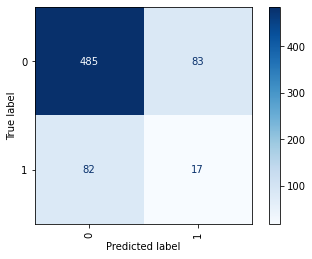

In [27]:
plot_confusion_matrix(dummyc, X_test_ohe, y_test, xticks_rotation = 'vertical', cmap = plt.cm.Blues)
print(classification_report(y_test, y_pred))

# SMOTE
The class imblance mean we will need to use an oversampling method. SMOTE will synthetically create new observations of the minority class.

In [32]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train_ohe, y_train)

In [33]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train_ohe)
X_test_scaled = scale.transform(X_test_ohe)

X_train_res_scaled = scale.fit_transform(X_train_res)

### Create a Pipeline

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

pipe = Pipeline([('mms', MinMaxScaler()),
                 ('logreg', LogisticRegression(random_state=8))])

In [ ]:
from sklearn.metrics import f1_score, balanced_accuracy_score, plot_confusion_matrix, classification_report